In [32]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


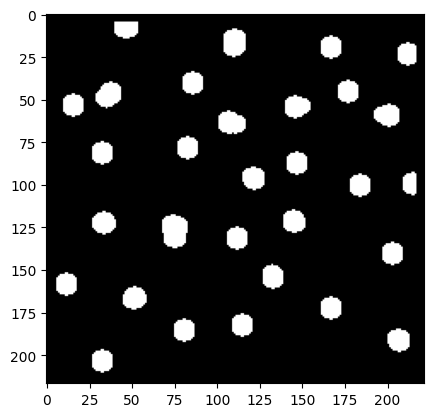

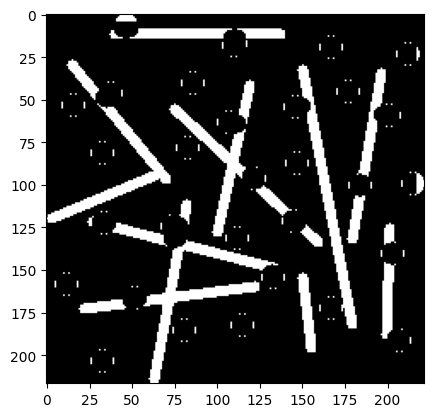

In [66]:
def erode(img, kernel):
    # Obtém as dimensões da imagem e do kernel
    rows, cols = img.shape
    krows, kcols = kernel.shape

    # Calcula o deslocamento do kernel
    offset_r = krows // 2
    offset_c = kcols // 2

    # Inicializa a imagem resultante
    img_erode = np.zeros_like(img, dtype=np.uint8)

    # Percorre cada pixel da imagem
    for r in range(offset_r, rows - offset_r):
        for c in range(offset_c, cols - offset_c):
            # Verifica se todos os pixels do kernel correspondem a pixels brancos na imagem
            is_match = True
            for kr in range(krows):
                for kc in range(kcols):
                    if kernel[kr, kc] == 1 and img[r + kr - offset_r, c + kc - offset_c] != 255:
                        is_match = False
                        break
                if not is_match:
                    break

            # Define o pixel como preto na imagem resultante
            if is_match:
                img_erode[r, c] = 255

    return img_erode


def dilate(img, kernel):
    # Obtém as dimensões da imagem e do kernel
    rows, cols = img.shape
    krows, kcols = kernel.shape

    # Calcula o deslocamento do kernel
    offset_r = krows // 2
    offset_c = kcols // 2

    # Inicializa a imagem resultante
    img_dilate = np.zeros_like(img, dtype=np.uint8)

    # Percorre cada pixel da imagem
    for r in range(offset_r, rows - offset_r):
        for c in range(offset_c, cols - offset_c):
            # Verifica se pelo menos um pixel do kernel corresponde a um pixel preto na imagem
            is_match = False
            for kr in range(krows):
                for kc in range(kcols):
                    if kernel[kr, kc] == 1 and img[r + kr - offset_r, c + kc - offset_c] == 255:
                        is_match = True
                        break
                if is_match:
                    break

            # Define o pixel como branco na imagem resultante
            if is_match:
                img_dilate[r, c] = 255

    return img_dilate


img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)
_, img_threshold = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY)

# Define o tamanho do elemento estruturante
raio_circulos = 11
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (raio_circulos, raio_circulos))

# Aplica a operação de abertura
img_erode = erode(img_threshold, kernel)
img_dilate = dilate(img_erode, kernel)

img_linhas = img1 - img_dilate

# Exibir a imagem resultante com os círculos
plt.imshow(img_dilate, cmap='gray', vmin=0, vmax=255)
plt.show()

# Exibir a imagem resultante com os círculos
plt.imshow(img_linhas, cmap='gray', vmin=0, vmax=255)
plt.show()

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 0]]


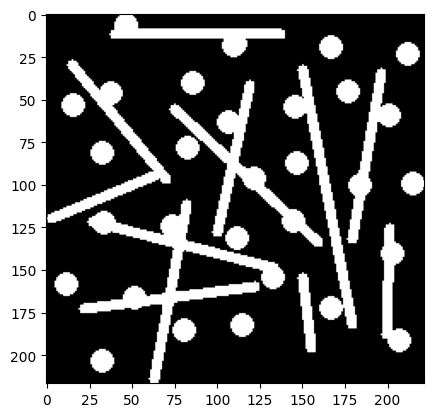

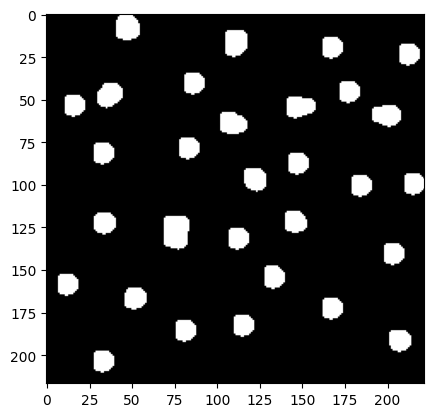

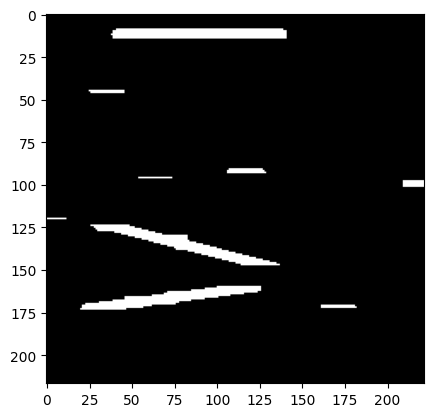

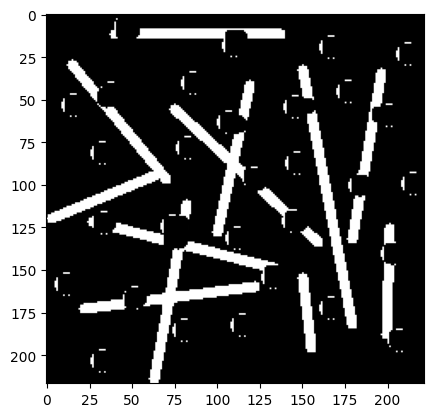

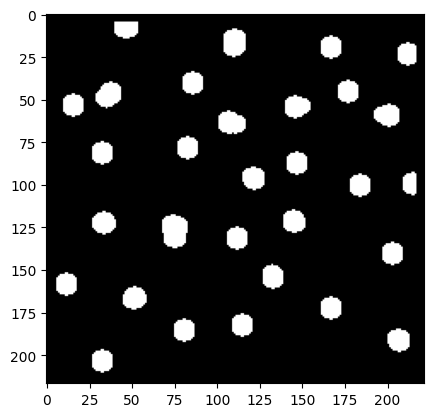

In [65]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

# Definir o raio do elemento estruturante para os círculos
raio_circulos = 10

# Criar o elemento estruturante na forma de um círculo
elemento_estruturante_circulos = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (raio_circulos, raio_circulos))

print(elemento_estruturante_circulos)

# Aplicar a abertura para extrair os círculos
circulos = cv2.morphologyEx(img1, cv2.MORPH_OPEN, elemento_estruturante_circulos)

# Definir o tamanho do elemento estruturante para as linhas
largura_linhas = 20
altura_linhas = 1

# Criar o elemento estruturante na forma de linhas horizontais
elemento_estruturante_linhas = np.ones((altura_linhas, largura_linhas), np.uint8)

# Aplicar a abertura para extrair as linhas
linhas = cv2.morphologyEx(img1, cv2.MORPH_OPEN, elemento_estruturante_linhas)

# Aplica a operação de abertura
img_lin = erode(img1, kernel)
img_ae = dilate(img_lin, kernel)

img4 = img1 - circulos

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(circulos, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(linhas, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img_ae, cmap='gray', vmin=0, vmax=255)
plt.show()

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


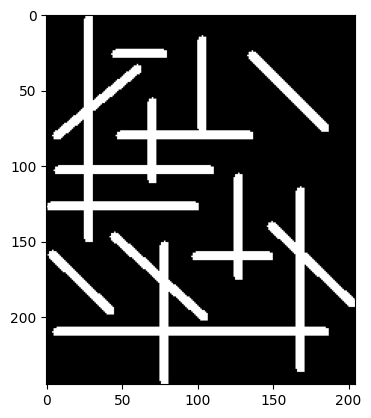

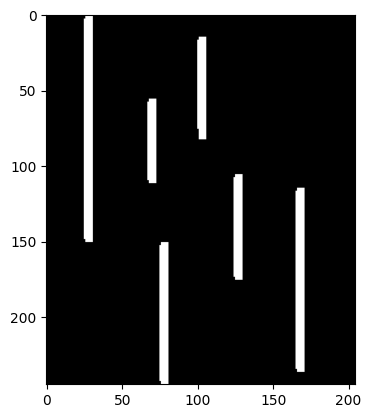

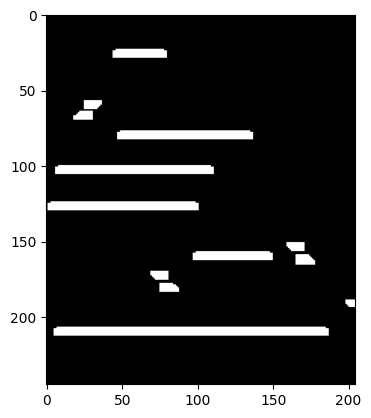

In [4]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

# Criar o elemento estruturante vertical
elem_est_vert = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 9))
elem_est_horiz = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))

# Aplicar a abertura para obter linhas verticais
linhas_verticais = cv2.morphologyEx(img2, cv2.MORPH_OPEN, elem_est_vert)

# Aplicar a abertura para obter linhas horizontais
linhas_horizontais = cv2.morphologyEx(img2, cv2.MORPH_OPEN, elem_est_horiz)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(linhas_verticais, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(linhas_horizontais, cmap='gray', vmin=0, vmax=255)
plt.show()

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?
    Não, a operacao de abertura faz com que ocorra uniao das áreas brancas da imagem preenchendo os vazios e conectando os objetos próximos, gerando a imagem mostrada a baixo.

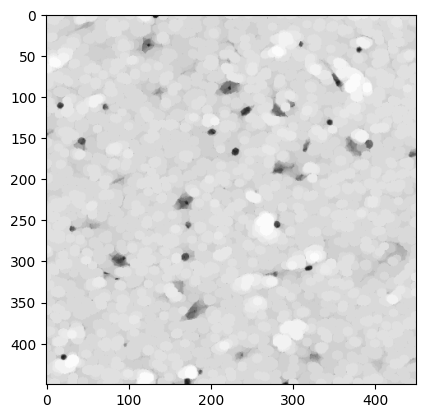

In [3]:
import cv2
import numpy as np

img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

# Realizar a abertura para reter os objetos grandes
elemento_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
operacao_abertura = cv2.morphologyEx(img3, cv2.MORPH_OPEN, elemento_circular)

# Mostrar a imagem resultante com os objetos pequenos retidos
plt.imshow(operacao_abertura, cmap='gray', vmin=0, vmax=255)
plt.show()


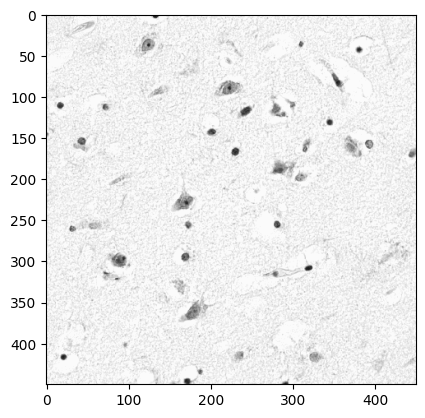

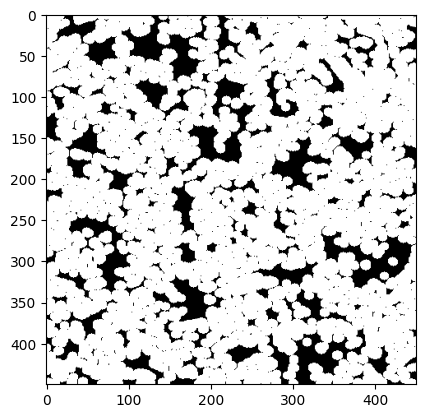

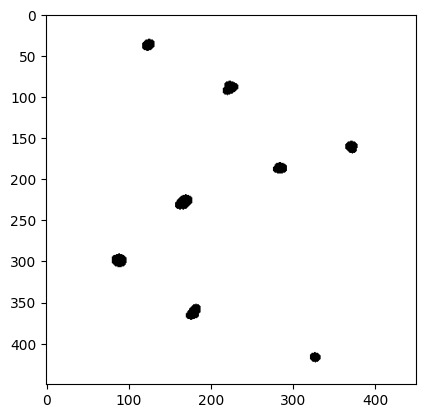

In [4]:
def converte_binario(img, threshold):
    matriz_img_binaria = np.zeros_like(img, dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] < threshold:
                matriz_img_binaria[i, j] = 0
            else:
                matriz_img_binaria[i, j] = 1

    return matriz_img_binaria


img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

# Aplica threshold de 210
threshold = 210

# img_threshold = 255 * (img3 <= threshold)
# img_threshold = converte_binario(img3, threshold)
_, img_threshold = cv2.threshold(img3, threshold, 255, cv2.THRESH_BINARY)

# gera o elemento circular de 11 pixels para reter as células grande
elemento_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)).astype(np.uint8)

# Aplicar a operação de abertura
operacao_abertura = cv2.morphologyEx(img_threshold, cv2.MORPH_OPEN, elemento_circular)

operacao_fechamento = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, elemento_circular)


plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(operacao_abertura, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(operacao_fechamento, cmap='gray', vmin=0, vmax=255)
plt.show()

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

In [81]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

# Aplica threshold na imagem, já calculando qual o threshold ideal para a imagem atraves do método otsu
# Deixando a imagem com valores 0 e 255

_, img_otsu = cv2.threshold(img4, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Aplicar operações morfológicas para remover ruídos e preencher buracos
kernel = np.ones((9,3), np.uint8) #3,9 -> 88

# Funcao pronta para realizar remocao de ruídos da imagem em regioes como a borda
img_morph = cv2.morphologyEx(img_otsu, cv2.MORPH_OPEN, kernel)

#num_labels, labels = cv2.connectedComponents(opening) #Nao funcionou

# # funcao pronta utilziada para encontrar os contornos de uma imagem
contornos, _ = cv2.findContours(img_morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

area_minima = 1000  # Área mínima para considerar um contorno como objeto

# area em pixels quadrados do contorno das coordenadas fornecidas
objetos = [cnt for cnt in contornos if cv2.contourArea(cnt) > area_minima]

num_objetos = len(objetos)
print("Número de objetos encontrados:", num_objetos)

Número de objetos encontrados: 89
